## Classifying Iris Species

어떤 종에 속하는지 이미 알고 있는 붓꽃들의 측정 데이터로부터 학습할 수 있는 머신 러닝 모델을 만든 후 새로 발견한 붓꽃이 어떤 종인지 예측해 보자. 각 붓꽃의 종이 정확히 무엇인지 알고 있는 데이터를 가지고 있기 때문에, 이것은 지도학습(supervised learning) 문제이다. 또한 여러 개의 옵션들(3개의 종) 중에 하나를 예측해야 하기 때문에 이것은 분류(classification) 문제이기도 하다. 

도출될 수 있는 결과들을 클래스(class)라고 부른다. 데이터셋에 포함된 모든 붓꽃은 세 개의 클래스 중 하나에 속한다. 하나의 데이터 포인트(1 row)에 대해 도출되길 원하는 결과(목표변수, target)는 이 꽃의 ‘종’이다. 하나의 특정한 데이터 포인트에 대해서 그것이 속해있는 클래스를 “레이블(label)”이라고 부른다.

iris 데이터셋은 scikit-learn의 datasets 모듈에 포함되어 있다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data load
from sklearn.datasets import load_iris
iris_dataset = load_iris()

iris_dataset은 dictionary처럼 키(key)와 값(value)을 가지고 있다.

In [3]:
iris_dataset.keys()

dict_keys(['DESCR', 'target_names', 'feature_names', 'data', 'target'])

DESCR : 데이터셋에 대한 설명.

target_names : 목표변수가 가리키는 클래스 목록. 여기서는 분류될 붓꽃의 종. 

feature_names : 각 feature(컬럼 또는 설명변수) 목록.

data : 각 데이터의 컬럼별 값이 들어있는 2차원 NumPy array.

target : 각 데이터(붓꽃)의 목표변수. 종에 해당하는 값이 들어있는 1차원 NumPy array. 0에서 2까지의 정수로 표시되어 있으며, 0은 setosa, 1은 versicolor, 그리고 2는 virginica 를 의미한다.

In [4]:
print(iris_dataset['DESCR'][:500] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

  
...


In [5]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
type(iris_dataset['data'])

numpy.ndarray

In [8]:
iris_dataset['data'].shape

(150, 4)

각각의 개별 아이템을 머신 러닝에서는 '샘플(sample)'이라고 하며, 그 특징을 나타내는 컬럼을 '피쳐(feature)'라고 한다. shape 는 데이터의 샘플 갯수와 피쳐 갯수를 보여준다. shape는 scikit-learn에서 습관적으로 사용되며, 데이터의 형태를 알려준다.

In [9]:
# 처음 5개의 샘플. feature_names 순 ('sepal length', 'sepal width', 'petal length', 'petal width')
iris_dataset['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [10]:
type(iris_dataset['target'])

numpy.ndarray

In [11]:
iris_dataset['target'].shape

(150,)

In [12]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 모델의 성과 측정 : 트레이닝 데이터와 테스트 데이터

모델의 성과를 측정하기 위해서 우리는 모델에게 레이블 되어 있는(목표값이 표시된) 새로운(이전에 학습해보지 않은) 데이터를 던져 주어야 한다. 이를 위해서 가지고 있는 레이블된 데이터를 두 개로 분리시킨다. 분리된 데이터 중 하나는 머신 러닝 모델을 만들기 위해 사용하며, 이것을 트레이닝 데이터(training data) 또는 트레이닝셋(training set)이라고 부른다. 데이터의 나머지 부분은 모델이 얼마나 잘 동작하는지 검증하기 위해 사용하며, 테스트 데이터(test data) 또는 테스트셋(test set)이라고 한다.

scikit-learn은 데이터셋을 뒤섞고 분리하는 train_test_split이라는 함수를 가지고 있다. 이 함수는 레이블의 분포를 고려하여 전체 행의 75%를 트레이닝 데이터에 할당하고, 나머지 25%를 테스트 데이터로 할당한다. 트레이닝 데이터와 테스트 데이터에 각각 얼만큼씩 할당할 것인지는 임의적으로 결정할 수 있다.

머신 러닝에서 데이터는 2차원 배열(매트릭스 matrix)이기 때문에 일반적으로 대문자 X를 사용하고, 목표 변수(레이블)는 1차원 배열(벡터 vector)이기 때문에 소문자 y를 사용한다.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# iris_dataset['data'] 를 x_train, x_test 로 나눈다.
# iris_dataset['target']를 y_train, y_test로 나눈다.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'])

train_test_split 함수는 데이터를 분리하기 전에 난수 생성을 통해 데이터셋을 뒤섞는다. 3개의 클래스 중 특정한 클래스만 포함하고 있는 테스트셋은 모델이 얼마나 일반화가 잘 되어 있는지 말해줄 수 없기 때문에, 모든 클래스가 테스트 데이터에 골고루 포함되도록 데이터를 잘 섞어야 한다.

X_train, X_test, y_train, y_test 는 모두 NumPy array이다.

In [16]:
X_train.shape

(112, 4)

In [17]:
y_train.shape

(112,)

In [18]:
X_test.shape

(38, 4)

In [19]:
y_test.shape

(38,)

### 데이터 탐색

머신 러닝 모델을 만들기 전에 데이터를 잘 살펴보는 것이 좋다. 머신 러닝 없이도 문제를 쉽게 해결할 수 있을지도 모르고, 또는 원하는 결과를 내는데 필요한 정보가 데이터에 포함되어 있지 않을 수도 있다. 또한 데이터를 잘 살피는 것은 이상값이나 특이값을 가진 데이터 포인트를 발견하는데 도움이 된다. 실제 상황에서도 데이터 내의 모순과 예측하지 못한 값들이 들어있는 경우는 매우 흔하다.

데이터를 점검하기 위해 가장 좋은 방법 중 하나는 시각화하는 것이다. 그 중 하나로 산점도(scatter plot)를 살펴보자. 컴퓨터 화면은 아쉽게도 2차원이기 때문에 우리는 산점도에서 한번에 2가지 (또는 3가지) 피쳐에 대해서만 볼 수 있다. 이 문제를 극복하기 위해 가능한 모든 피쳐들의 쌍에 대해서 보여주는 산점도 행렬(pair plot)를 사용하기도 한다. 만약 가지고 있는 데이터의 피쳐 갯수가 적다면 추천할 만하다. 하지만 pair plot이 모든 피쳐들의 상호작용을 한번에 보여주지 못한다. 데이터의 어떤 측면은 이 방법으로 시각화를 해도 드러나지 않을 수 있다.

그림 1-3은 트레이닝 데이터의 피쳐들에 대한 pair plot이다. 각 데이터 포인트는 자신이 속한 종에 따라서 색상을 표시했다. pair plot을 그리기 위해 우선 데이터의 NumPy array를 pandas의 DataFrame으로 변환해야 한다. pandas는 scatter_matrix라는 pair plot을 위한 함수를 가지고 있다.

In [20]:
# X_train 데이터로 dataframe을 만든다.
# 컬럼명은 iris_dataset.feature_names 의 문자열을 사용한다.

In [21]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.3,2.9,5.6,1.8
1,5.0,2.0,3.5,1.0
2,6.9,3.2,5.7,2.3
3,6.7,3.1,5.6,2.4
4,5.4,3.9,1.3,0.4


In [22]:
# y_train을 기준으로 색상 표시에 사용할 map을 만든다.

In [24]:
color_wheel = {1: '#377eb8', 2: '#4eae4b', 3: '#e41a1c'}
color_df = pd.DataFrame(y_train)
colormap = color_df[0].map(lambda x: color_wheel.get(x+1))

In [25]:
# dataframe으로 부터 산점도 행렬을 만든다.

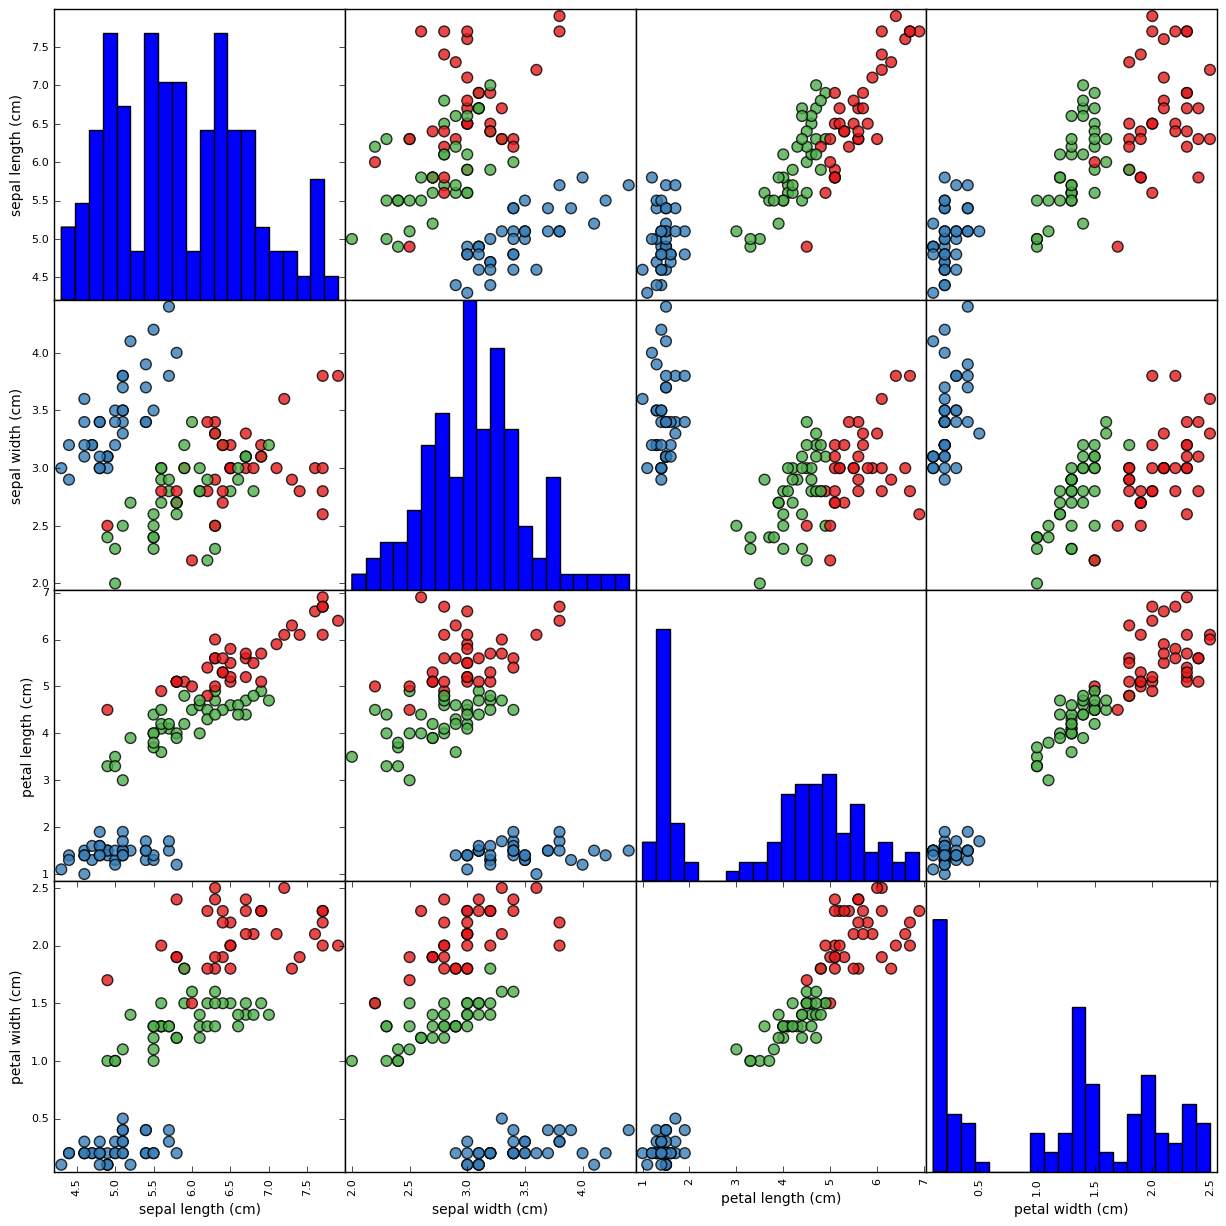

In [27]:
pplot = pd.scatter_matrix(iris_df, c=colormap, figsize=(15, 15), marker='o', 
                          hist_kwds={'bins': 20}, s=60, alpha=.8)

그림 1-3. 붓꽃 데이터셋의 pair plot. 클래스 레이블에 따라 색상 표시.

pair plot을 통해 우리는 세 개의 클래스가 꽃받침과 꽃잎의 측정치에 따라 어느 정도 구분되어 있음을 알 수 있다. 이는 머신 러닝 모델이 그것들을 구분할 수 있도록 학습시킬 수 있음을 의미한다.

### 첫번째 모델 : k-최근접 이웃

이제 실제적인 머신 러닝 모델을 만들어 보자. scikit-learn에는 사용할 수 있는 분류분석 알고리즘이 매우 많다. 여기서 우리가 사용할 것은 이해하기 쉬운 k-최근접 이웃 분류기(k-nearest neighbors classifier)이다. 모델을 생성하기 위해 트레이닝 데이터를 넣어 주기만 하면 된다. 새 데이터 포인트에 대해 예측을 하기 위해서 알고리즘은 트레이닝 데이터의 포인트 중에서 새 데이터와 가장 가까운 포인트를 찾아낸다. 그리고 그 지점의 트레이닝 데이터가 가진 레이블을 새 데이터 포인트의 레이블로 할당한다.

k-최근접 이웃에서 k는 트레이닝 데이터에서 새로운 데이터 포인트와 가장 가까운 데이터 포인트를 몇 개까지 선택할 것이지를 지시하는 고정된 숫자이다. 이 이웃들 중에서 우세한 클래스를 예측된 결과로 반환한다. 더 자세한 내용은 “제2장”에서 살펴보고, 여기서는 최근접 이웃을 한 개만 사용한다.

scikit-learn의 모든 머신 러닝 모델은 Estimator 클래스라고 불리는 자기 소유의 클래스에서 구현된다. k-최근접 이웃 분류 알고리즘은 neighbors 모듈에 있는 KNeighborsClassifier에서 구현된다. 그래서 우리는 모델을 사용하기 전에 클래스를 객체로 인스턴스화해야 한다. KNeighborsClassifier의 가장 중요한 파라미터는 이웃의 갯수이며, 우리는 여기서 1로 설정한다.

In [ ]:
# k-최근접 이웃 분류기를 import 한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 최근접 이웃의 갯수를 1로 정하고 KNeighborsClassifier를 인스턴스화 한다.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn 객체는 트레이닝 데이터로부터 모델을 생성하기 위해 사용될 알고리즘 뿐만 아니라, 새로운 데이터 포인트에 대하여 예측을 수행할 알고리즘도 포함하고 있다.


트레이닝셋으로 모델을 만들기 위해서 knn 객체의 fit 메소드를 호출한다. 이 메소드는 트레이닝 데이터인 X_train과 트레이닝 레이블인 y_train을 인수로 취한다.

In [ ]:
knn.fit(X_train, y_train)

fit 메소드는 knn 객체 자체, 즉 우리의 분류기인 KNeighborsClassifier를 반환한다. 반환된 결과에서 우리는 모델을 생성하는데 사용된 파라미터들을 확인할 수 있다. 아마도 거의 모두가 기본 설정값(default value)이고, n_neighbors=1 하나만 우리가 지정한 값일 것이다. scikit-learn의 모델들은 많은 파라미터를 가지고 있는데, 그 대부분은 처리 속도 최적화 아니면 아주 특별한 경우에 사용하는 것이다. 그러므로 위 반환값이 보여주는 다른 파라미터들은 신경쓰지 않아도 된다.

### 예측

이제 이 모델을 이용해서 정확한 레이블이 무엇인지 모르는 새로운 데이터에 대한 예측을 수행해 보자. 우리가 길가에서 새로 발견한 붓꽃의 꽃받침 길이가 5cm, 너비가 2.9 cm 이고, 꽃잎 길이가 1 cm, 너비가 0.2 cm 라고 가정해보자. 이 붓꽃의 종은 무엇일까? 우선 이 데이터를 샘플 수(1)와 피쳐 수(4)로 된 형태의 NumPy array로 만든다.

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [ ]:
X_new.shape

scikit-learn에서는 항상 2차원 NumPy array를 데이터 타입으로 원하고 있음을 기억할 것이다. 

예측 결과를 얻기 위해 knn 객체의 predict 메소드를 호출한다.

In [ ]:
prediction = knn.predict(X_new)

In [ ]:
print(prediction)

In [ ]:
print(iris_dataset['target_names'][prediction])

우리의 모델은 새 붓꽃이 클래스 0 (setosa)에 속한다고 예측했다. 하지만 이 모델을 얼마나 신뢰할 수 있을까?

### 모델 평가

우리가 처음에 테스트셋을 만든 이유가 여기에 있다. 이 데이터는 모델을 만들 때 사용되지 않았지만, 각 붓꽃이 정확히 무슨 종인지 그 결과를 알고 있다. 그러므로 우리는 테스트 데이터의 각 붓꽃에 대해 예측을 해본 후 그것을 각각의 레이블(알고 있는 종)과 비교해 볼 수 있다. 레이블된 종과 예측한 종을 비교하면 그 정확도(accuracy)를 계산할 수 있기 때문에 이 모델이 얼마나 잘 작동하는지 측정할 수 있다.

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
np.mean(y_pred == y_test)

knn 객체의 score 메소드를 사용하면 우리가 계산한 정확도와 같은 값을 바로 얻을 수 있다.

In [ ]:
knn.score(X_test, y_test)

이 모델의 테스트 데이터에 대한 정확도는 약 0.97이며, 이것은 테스트셋 중 97%의 붓꽃에 대해 정확한 예측을 했음을 의미한다. 그러므로 우리가 새로 발견한 붓꽃에 대한 모델의 예측이 97% 정확하다고 말할 수 있다. 나중에 우리는 이 성능을 더 향상시키는 방법과 그에 따른 위험에 대해 더 논의할 것이다.

### 1장 정리

이제 우리가 1장에서 배운 내용을 정리해 보자. 우리는 머신 러닝에 대한 간략하게 살펴본 후 지도학습과 비지도학습의 차이점을 얘기했다. 그 다음으로 우리는 꽃들을 물리적으로 측정한 데이터를 이용하여 특정한 붓꽃이 어떤 종에 속하는지 예측하는 방법을 계획했다. 지도학습의 방법론을 따라 전문 식물학자가 측정하여 각 꽃의 정확한 종을 명시해놓은 데이터를 모델을 만드는데 사용한다. 한 붓꽃이 속한 종을 “레이블”이라고 부르며, 여기에는 setosa, versicolor, virginica의 세 가지 종이 있기 때문에 우리는 이것은 3개 클래스에 대한 분류분석 문제로 정의했다.

붓꽃 데이터셋은 2개의 NumPy array로 구성되어 있다. 하나는 데이터이며 scikit-learn에서 X로 지칭된다. 다른 하나는 정확한(도출되길 원하는) 목표값이 포함된 배열이며 y로 지칭된다. X는 피쳐를 가진 2차원 배열로서 데이터 포인트 당 하나의 행(row), 피쳐 당 하나의 열(column)을 가지고 있다. y는 1차원 배열로서 각 샘플 당 하나의 클래스 레이블을 0에서 2까지 범위의 정수로서 가지고 있다.

우리는 데이터셋을 모델을 만드는데 사용하는 트레이닝 데이터와, 모델이 이전에 보지 못한 새로운 데이터에 대한 예측력을 얼마나 가지는지 평가할 때 사용하는 테스트 데이터로 분리했다.

우리는 k-최근접 이웃 분류분석 알고리즘을 선택했다. 이 알고리즘은 새로운 데이터 포인트에 대해 트레이닝 데이터 중 가장 가까운 이웃을 찾아 예측 결과를 만든다. 모델 생성 및 예측은 알고리즘을 가지고 있는 KNeighborsClassifier를 통해 구현했다. 먼저 이 클래스를 파라미터와 함께 인스턴스화 시킨다. 그 다음 fit 메소드를 통해 트레이닝 데이터를 넘겨주고 모델을 생성한다. 그리고 score 메소드로 테스트 데이터에 대한 정확도를 알 수 있다. 이 정확도가 새로운 데이터에 적용할 수 있을만한 신뢰를 준다면 predict 메소드를 호출하여 새로운 데이터 포인트에 대한 예측을 수행할 수 있다.

여기까지의 코드를 정리하면 다음과 같다.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'], random_state=0)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
prediction = knn.predict(X_new)

이것은 scikit-learn에 있는 머신 러닝 알고리즘의 핵심을 포함하고 있다. fit, predit, score 메소드는 scikit-learn 내부의 지도학습 알고리즘들의 공통 인터페이스이다.

다음 장에서 우리는 다른 유형이 지도학습 모델들을 좀 더 깊이있게 다룰 것이다.